<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/Methodology/Model_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip3 install pickle5

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle5 as pickle
from pprint import pprint

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

In [ ]:
id2word = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/id2word.pkl", "rb"))
corpus = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/corpus.pkl", "rb"))
data_ready = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/data_ready.pkl", "rb"))

### Build the Topic Model

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

In [ ]:
!unzip mallet-2.0.8.zip

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'  

In [ ]:
num_topics=50

In [ ]:
alpha=5/num_topics

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=2000, alpha=alpha)

Below you can find the 50 topics formed by the model. For each topic there are 10 terms and their relative weights next to it in descending order. 

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False, num_topics=num_topics))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('family', 0.04364932076312078),
   ('dining', 0.029619181946403384),
   ('food', 0.021676193304134807),
   ('child', 0.018112983445920865),
   ('week', 0.017667582213644124),
   ('meal', 0.013881671739291812),
   ('visit', 0.012471234503748794),
   ('type', 0.010763863113354614),
   ('dinner', 0.008982258184247643),
   ('home', 0.008908024645534854)]),
 (1,
  [('company', 0.05428640134663942),
   ('innovation', 0.04045930022844776),
   ('activity', 0.01635205001803535),
   ('stakeholder', 0.015510400384754118),
   ('organization', 0.012023566189731874),
   ('business', 0.011362270049296621),
   ('corporate', 0.010640856077912708),
   ('tourism', 0.010039677768426115),
   ('strategy', 0.010039677768426115),
   ('product', 0.009979559937477456)]),
 (2,
  [('common', 0.02756916056659378),
   ('bias', 0.025667839148208006),
   ('variance', 0.01920334632569636),
   ('organizational', 0.01825268561650347),
   ('management', 0.017967487403745604),
   ('culture', 0.017111892765472002)

In [ ]:
# pickle.dump(ldamallet, open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/model_50.pkl", "wb"))

In [ ]:
ldamallet = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/model_50.pkl", "rb"))

In [ ]:
tm_results = ldamallet[corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=10)] for n in range(0, ldamallet.num_topics)]


Below is the Topic-Term matrix shows 10 terms that forms each topic.   

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30,Topic 31,Topic 32,Topic 33,Topic 34,Topic 35,Topic 36,Topic 37,Topic 38,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50
Term1,family,company,common,satisfaction,festival,percent,tourism,team,return,server,room,room,asset,guest,criterion,cent,scenario,theme,subject,management,rating,student,price,quality,positive,food,event,website,social,business,estimate,demand,significant,menu,wine,cost,brand,online,code,supervisor,reliability,environmental,casino,chinese,water,host,property,article,efficiency,satisfaction
Term2,dining,innovation,bias,quality,visitor,exhibit,tourist,percent,risk,tip,price,average,size,attribute,importance,average,failure,interviewee,experiment,career,score,member,attribute,dimension,negative,local,convention,online,case,network,regression,case,variance,food,luxury,activity,visit,travel,category,behavior,validity,green,game,tourist,room,airbnb,chain,journal,input,feel
Term3,food,activity,variance,significant,area,wait,destination,satisfaction,market,condition,booking,market,sale,room,expert,report,recovery,qualitative,advertisement,training,word,hospitality,choice,perceive,emotion,safety,exhibition,post,approach,market,dependent,error,correlation,healthy,consumer,unit,loyalty,perceive,process,control,assess,practice,robot,korean,system,accommodation,company,paper,output,complete
Term4,child,stakeholder,organizational,consumer,city,scenario,country,range,event,female,online,revenue,control,stay,matrix,control,condition,code,image,skill,feature,program,purchase,consumer,condition,health,cruise,content,process,relationship,independent,condition,support,order,winery,department,consumer,adapt,qualitative,individual,dimension,sustainability,gaming,translate,guest,list,type,hospitality,cost,reliability
Term5,week,organization,management,perceive,destination,duration,region,frontline,stock,woman,book,price,ratio,rating,weight,focus,server,informant,photo,hospitality,positive,club,product,food,feel,inspection,exhibitor,user,context,resource,coefficient,period,relationship,condition,consumption,sale,equity,demographic,step,subordinate,propose,environment,resort,country,floor,listing,room,tourism,production,dimension
Term6,meal,business,culture,support,local,average,travel,supervisor,index,size,rating,segment,financial,satisfaction,important,context,manipulation,data,design,position,sentiment,complete,discount,perception,perceive,taste,visitor,message,individual,marketing,category,series,satisfaction,entree,purchase,minute,strong,section,content,complete,pilot,management,player,language,maintenance,guest,international,author,score,participate
Term7,visit,corporate,store,relationship,site,business,activity,point,change,difference,star,occupancy,market,quality,process,majority,read,focus,video,staff,negative,participate,preference,attribute,emotional,violation,expo,reviewer,people,financial,function,data,reliability,meal,coffee,hour,select,complete,case,organizational,range,sustainable,play,female,energy,property,size,keyword,function,validity
Term8,type,tourism,order,type,business,party,sector,score,period,control,website,period,growth,staff,element,account,design,approach,chinese,focus,term,send,option,dining,people,product,attendee,comment,understand,owner,distribution,forecast,assess,choice,product,food,perceive,stay,approach,department,examine,indicator,daily,translation,consumption,peer,independent,search,profit,adapt
Term9,dinner,strategy,diversity,influence,tourist,size,cluster,assess,estimate,average,channel,impact,earning,facility,evaluation,reliability,manipulate,process,treatment,practice,text,cluster,consumer,section,consumer,foodservice,attribute,site,tourism,size,equation,technique,loading,d

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )

In [ ]:
topics_df

,Terms per Topic
Topic1,"family, dining, food, child, week, meal, visit, type, dinner, home"
Topic2,"company, innovation, activity, stakeholder, organization, business, corporate, tourism, strategy, product"
Topic3,"common, bias, variance, organizational, management, culture, store, order, diversity, unit"
Topic4,"satisfaction, quality, significant, consumer, perceive, support, relationship, type, influence, attitude"
Topic5,"festival, visitor, area, city, destination, local, site, business, tourist, tourism"
Topic6,"percent, exhibit, wait, scenario, duration, average, business, party, size, label"
Topic7,"tourism, tourist, destination, country, region, travel, activity, sector, cluster, accommodation"
Topic8,"team, percent, satisfaction, range, frontline, supervisor, point, score, assess, stress"
Topic9,"return, risk, market, event, stock, index, change, period, estimate, price"
Topic10,"server, tip, condition, female, woman, size, difference, control, average, gender"


### WordClouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
plt.rcParams['figure.figsize'] = [25, 25]

Below is the word clouds, one for each topic. The font sizes of words show their relative weights in the topic.

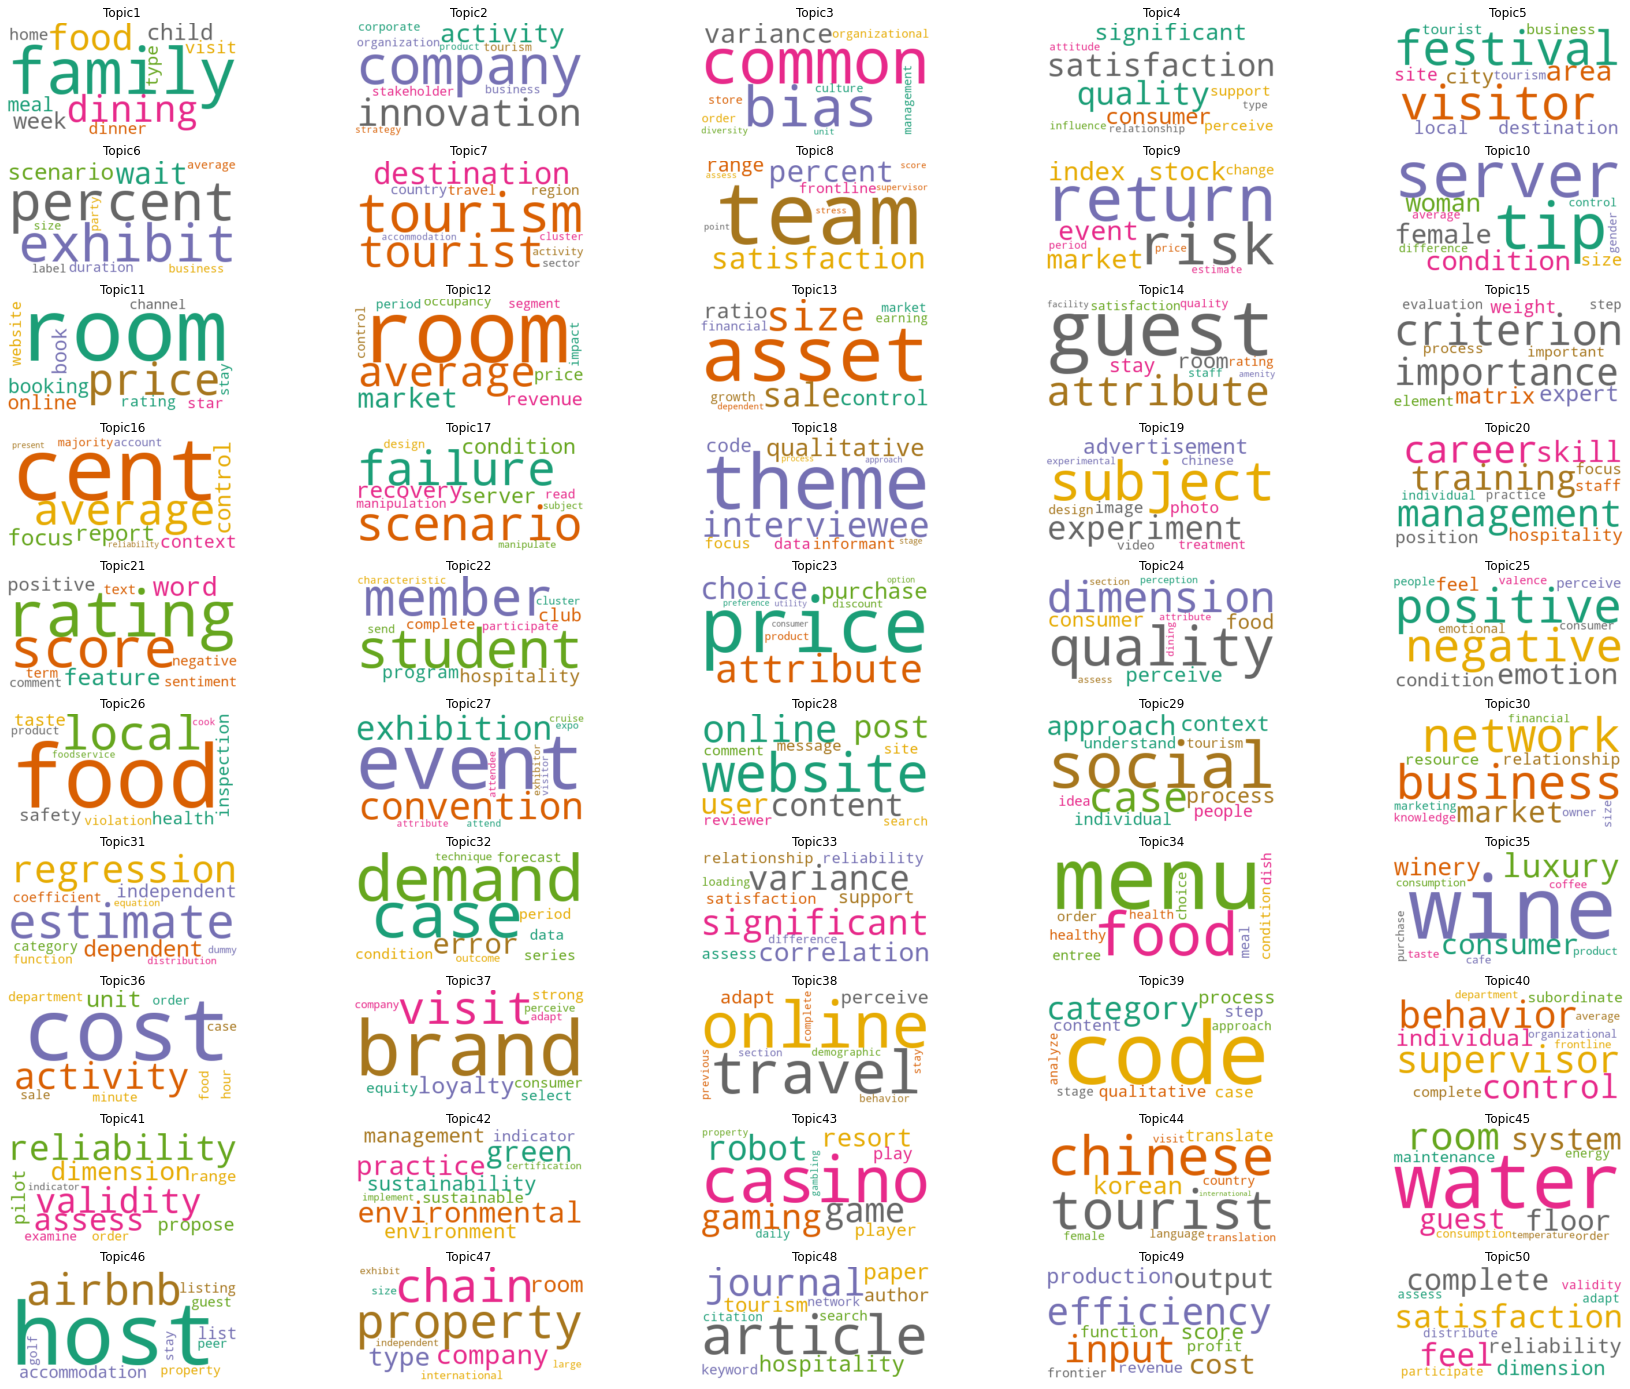

In [ ]:
# Create subplots for each comedian
i=0
for i in range(num_topics):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(10, 5, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
new_lda = convertldaGenToldaMallet(ldamallet)

In [ ]:
vis_data = gensimvis.prepare(new_lda, corpus, id2word, sort_topics=False, n_jobs=1)
pyLDAvis.display(vis_data)